# Sentiment Analysis

#### Sentiment Analysis is a Natural Language Processing (NLP) technique used to determine whether a piece of text expresses a positive, negative, or neutral opinion.
For example:

"I loved this movie!" → Positive

"This movie was boring." → Negative

It’s widely used in customer reviews, social media, and feedback systems.

#### About the IMDB Dataset

The IMDB Dataset of 50K Movie Reviews contains 50,000 reviews of movies.

Each review is labeled as either positive or negative (binary classification).

The dataset is balanced: 25,000 positive reviews and 25,000 negative reviews.

It’s designed for training and testing sentiment analysis models — both traditional ML and deep learning approaches.

Dataset Link:
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## Dataset Uploading

### Libraries Importing

In [24]:
import re
import nltk
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [25]:
import nltk

# Download necessary resources
nltk.download('punkt')        # for tokenization
nltk.download('punkt_tab')    # required in new NLTK versions
nltk.download('stopwords')    # for stopword removal
nltk.download('wordnet')      # for lemmatization
nltk.download('omw-1.4')      # WordNet corpus support


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [27]:
df = pd.read_csv(path + "/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [28]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Dataset Exploration

In [29]:
print("Shape:", df.shape)

Shape: (50000, 2)


In [30]:
print("\nColumns:", df.columns.tolist())


Columns: ['review', 'sentiment']


In [31]:
print("\nData Types:\n", df.dtypes)


Data Types:
 review       object
sentiment    object
dtype: object


In [32]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 review       0
sentiment    0
dtype: int64


In [33]:
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 418


In [34]:
print("\nClass Distribution:\n", df['sentiment'].value_counts())


Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [35]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Visualizing Class Distribution

/tmp/ipython-input-633632321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


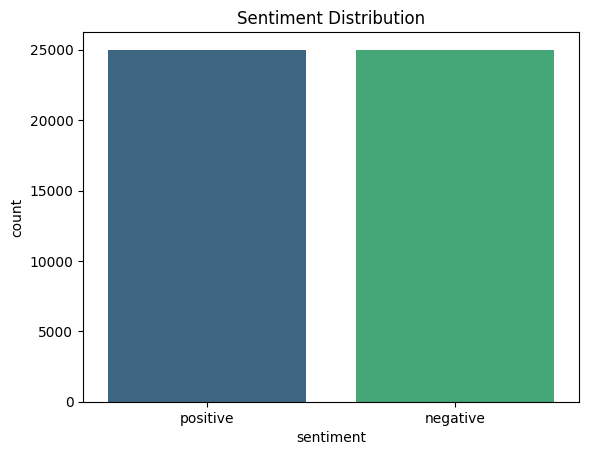

In [36]:
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

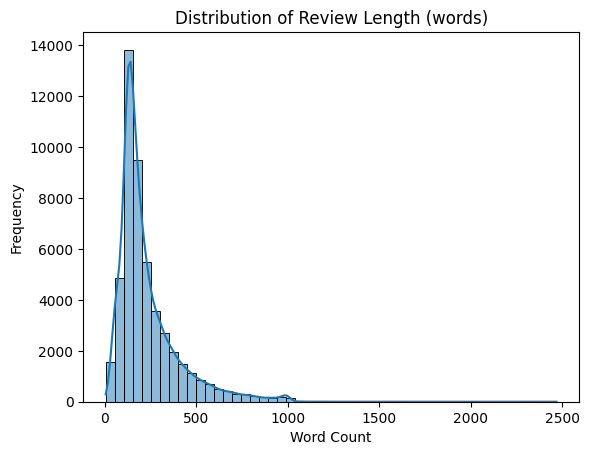

In [37]:
#Review Length Distribution
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Length (words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()



This graph shows that most IMDB reviews are short to medium length, around 100–300 words.
Only a few reviews are extremely long, reaching over 1000 words.
So, the dataset is skewed towards shorter reviews with rare outliers.

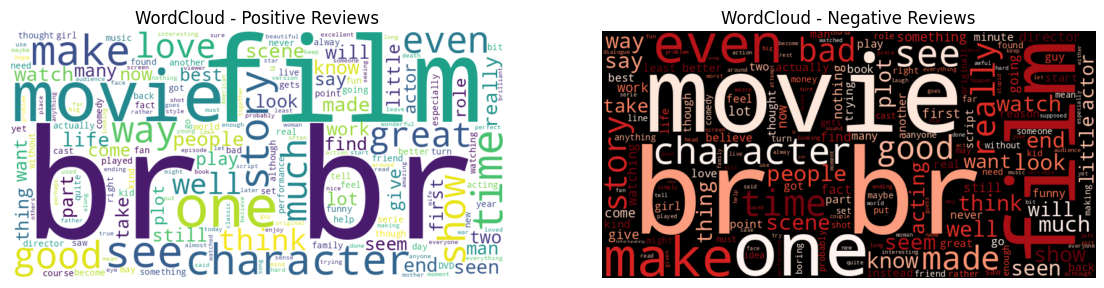

In [38]:
# Word Clouds for Positive and Negative Reviews

pos_text = " ".join(df[df['sentiment']=='positive']['review'])
neg_text = " ".join(df[df['sentiment']=='negative']['review'])

wc_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Reviews")
plt.show()

Positive reviews often use words like great, love, well, film, good.

Negative reviews highlight words like bad, boring, worst, nothing, waste.

This shows clear word patterns separating positive and negative sentiments.

## Preprocessing

Duplicate Remova

In [39]:
df = df.drop_duplicates()


Tokenization, Stopword Removal, Stemming, Lemmatization

-Essential to transform raw text into manageable, meaningful tokens

-Stemming and lemmatization reduce vocabulary sparsity and group word variants


In [40]:
# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Dictionary for expanding common contractions
contractions = {
    "can't": "cannot", "won't": "will not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'t": " not", "'ve": " have",
    "'m": " am"
}

negations = {"not", "no", "never", "n't"}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Contraction Expansion

In English, we often shorten words:

"can't" → "cannot"

"won't" → "will not"

"isn't" → "is not"

If we don’t expand contractions, the model will see "can't" as a completely different token from "cannot". Expanding contractions makes the text more consistent and reduces confusion for the model.

👉 Example:

Original: "I can't watch this movie"

Expanded: "I cannot watch this movie"

Here’s what it does step by step:

-Builds a regex pattern:

It takes all the contraction keys from your dictionary (like "can't", "won't", "n't", etc.).

It combines them into one regular expression so the function can find any contraction inside the text.

-Replaces contractions:

Using pattern.sub(...), it looks for matches in the text.

The lambda m: contractions[m.group(0)] tells it: replace the matched contraction with its expanded form from the dictionary.

-Returns expanded text:

Example: "I can't do this" → "I cannot do this"

"She won't go" → "She will not go"

In [41]:
def expand_contractions(text):
    pattern = re.compile('({})'.format('|'.join(re.escape(k) for k in contractions)))
    return pattern.sub(lambda m: contractions[m.group(0)], text)

## Negation Handling

Negations (like not, never, no, isn’t) flip the meaning of the sentence.

"good" → positive

"not good" → negative

If we remove “not” as a stopword, the model will wrongly see "not good" as "good".

So we keep negations and sometimes even attach them to the next word (e.g., "not_good") so the model understands the flipped meaning.

👉 Example:

Original: "The movie is not good"

After negation handling: ["not", "good"] or "not_good"

This helps the model learn that "not good" is usually negative sentiment.

Here’s what it does in words:

1-Start scanning the tokens (words in a sentence).

2-If the word is a negation (like not, never, no, n't):

Turn on a flag (neg = True).

Add the negation word itself to the result.

3-As long as the negation flag is on, every following word gets "not_" added in front of it.

Example: "good" becomes "not_good".

4-When punctuation like . ! ? is found, it turns off the negation scope (neg = False).

5-Finally, it returns the updated list of tokens.

In [47]:
def mark_negations(tokens):
    result = []
    skip_next = False

    for i, w in enumerate(tokens):
        if skip_next:
            skip_next = False
            continue

        if w in negations and i + 1 < len(tokens):
            # Combine negation with the next word
            result.append("not_" + tokens[i+1])
            skip_next = True
        else:
            result.append(w)

    return result


In [48]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) - {"not", "no", "never"}  # keep negation words

def preprocess_text(text):
    # Remove HTML & lowercase
    text = re.sub(r'<[^>]+>', ' ', text).lower()

    # Expand contractions
    text = expand_contractions(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Keep only alphabetic tokens + keep negations
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]

    # Apply negation handling
    tokens = mark_negations(tokens)

    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens]

    return lemmatized


In [49]:
sample = "I didn't like the movie; it wasn't good at all!"
print(preprocess_text(sample))


['not_like', 'movie', 'not_good']


## Apply Preprocessing to the Whole Dataset

In [45]:
# Apply preprocessing to the entire dataset
df['lemmatized_tokens'] = df['review'].apply(preprocess_text)

# Join tokens back into text form (for ML models like TF-IDF, Logistic Regression)
df['clean_review'] = df['lemmatized_tokens'].apply(lambda x: " ".join(x))

/tmp/ipython-input-3226718171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_tokens'] = df['review'].apply(preprocess_text)
/tmp/ipython-input-3226718171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['lemmatized_tokens'].apply(lambda x: " ".join(x))


In [46]:
# Show sample
df[['review', 'clean_review']].head(5)

,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


## Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 39665
Test size: 9917


## TF-IDF Vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shape (train):", X_train_tfidf.shape)


TF-IDF matrix shape (train): (39665, 5000)


## Training a Baseline Model (Logistic Regression)

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr_model = LogisticRegression(max_iter=200, solver='liblinear')
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr_model.predict(X_test_tfidf)


## Model Evaluation

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8822224463043259


In [58]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4940
    positive       0.87      0.90      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [59]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[4291  649]
 [ 519 4458]]


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

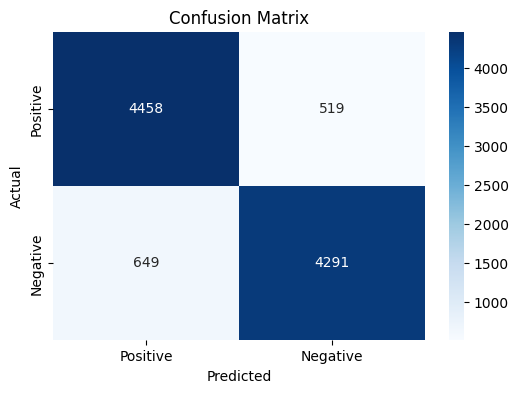

In [61]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## ROC-AUC

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:,1]
roc_auc = roc_auc_score((y_test=="positive").astype(int), y_pred_proba)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9535594910678188


## Cross-Validation

cross_val_score to confirm model stability across different splits ,Prevents relying on a single train-test split.

In [64]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [65]:
cv_scores = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.88402874 0.88049918 0.88062524 0.87810412 0.88024707]
Mean Accuracy: 0.8807008697844447


The model is stable → all 5 scores are very close (between ~87.8% and ~88.4%).

There is no big variance between folds, so the model generalizes well.

Logistic Regression with TF-IDF is giving a strong baseline performance on this dataset.

## Model Comparison

In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

Naive Bayes

In [67]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.800443682565292


SVM

In [68]:
# Support Vector Machine (Linear Kernel)
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8791973379046083


Logistic Regression

In [69]:
# Logistic Regression (already trained)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8822224463043259


Winner: Logistic Regression (best accuracy, stable results).

Close second: SVM (still very strong).

Naive Bayes: weaker, but very efficient for quick baselines.

## Hyperparameter Tuning

Use GridSearchCV on Logistic Regression  to optimize performance.

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Logistic Regression Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_lr = grid.best_estimator_
print("Test Accuracy with Best LR:", accuracy_score(y_test, best_lr.predict(X_test_tfidf)))


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best CV Score: 0.8790117052305441
Test Accuracy with Best LR: 0.8822224463043259


1-The best setting is C = 1 (regularization strength) and liblinear solver.


* C=1 means a balanced regularization → avoids overfitting but keeps performance high.
*  liblinear is a good choice for small to medium datasets with binary classification.




2-Cross-validation (CV) accuracy is ~87.9%, which matches closely with your test accuracy.


*   This consistency means your model is well-generalized, not overfitting.


3-Final test accuracy is ~88.2%, confirming Logistic Regression is optimal for this dataset.

## Error Analysis

In [72]:
# 🔹 Check misclassified reviews
test_results = pd.DataFrame({
    "Review": X_test,
    "Actual": y_test,
    "Predicted": y_pred
})

# Misclassified examples
errors = test_results[test_results["Actual"] != test_results["Predicted"]]
print("Number of misclassified reviews:", len(errors))

# Show some random misclassifications
errors.sample(5, random_state=42)


Number of misclassified reviews: 1168


,Review,Actual,Predicted
6584,film another director tim burton attempt capit...,negative,positive
4225,really interesting film first time seen relati...,positive,negative
47827,punishment park made peter watkins premise nat...,positive,negative
35556,back scotland lassie trial life faithful dog s...,negative,positive
8576,old liked hard get christopher lloyd played wa...,negative,positive


Number of misclassified reviews: 1168 out of 10,000 test reviews.

→ That means about 11.6% of reviews were wrongly predicted.

## Test the Sentiment Analysis Model

In [73]:
# Test the trained Logistic Regression model interactively

def predict_sentiment(review):
    # Preprocess review
    clean_tokens = preprocess_text(review)
    clean_text = " ".join(clean_tokens)

    # Transform with TF-IDF
    tfidf_vector = tfidf.transform([clean_text])

    # Predict
    prediction = best_lr.predict(tfidf_vector)[0]
    proba = best_lr.predict_proba(tfidf_vector)[0]

    print(f"Review: {review}")
    print(f"Predicted Sentiment: {prediction}")
    print(f"Confidence: {max(proba)*100:.2f}%")


In [74]:
predict_sentiment("I absolutely loved this movie, it was fantastic!")
predict_sentiment("This was the worst film I have ever seen.")
predict_sentiment("The movie had great visuals but the story was boring.")

Review: I absolutely loved this movie, it was fantastic!
Predicted Sentiment: positive
Confidence: 96.00%
Review: This was the worst film I have ever seen.
Predicted Sentiment: negative
Confidence: 97.47%
Review: The movie had great visuals but the story was boring.
Predicted Sentiment: negative
Confidence: 56.78%


## Save the Trained Model + Vectorizer

In [78]:
import pickle

# Save the trained Logistic Regression model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(best_lr, f)

# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [79]:
# Load trained model + TF-IDF
with open("sentiment_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)


## Load Them in app.py

## Deployment  (Flask + pyngrok)

In [88]:
!pip install pyngrok
!ngrok authtoken 2gI5T14n4zi00vTgYeNlW6AsIRC_4DUGgYFTdCxqMuj3UZVD   # paste your actual token


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [93]:
!pip install flask pyngrok


In [102]:
%%writefile app.py
from flask import Flask, request, jsonify, render_template_string
import pickle

# Load model + vectorizer
with open("sentiment_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("/content/tfidf_vectorizer.pkl", "rb") as f:
    tfidf = pickle.load(f)

app = Flask(__name__)

# HTML template
HTML_PAGE = """
<!DOCTYPE html>
<html>
<head>
    <title>Sentiment Analysis</title>
    <style>
        body { font-family: Arial; margin: 50px; }
        .positive { color: green; font-weight: bold; }
        .negative { color: red; font-weight: bold; }
        textarea { width: 500px; height: 100px; }
        button { padding: 8px 16px; margin-top: 10px; }
    </style>
</head>
<body>
    <h2>🎬 Movie Review Sentiment Analysis</h2>
    <form method="post" action="/predict_form">
        <textarea name="review" placeholder="Enter your review here..."></textarea><br>
        <button type="submit">Analyze</button>
    </form>
    {% if prediction %}
        <h3>Prediction:
            <span class="{{ prediction }}">{{ prediction }}</span>
        </h3>
        <h4>Confidence: {{ confidence }}%</h4>
    {% endif %}
</body>
</html>
"""


@app.route("/", methods=["GET"])
def home():
    return render_template_string(HTML_PAGE)

@app.route("/predict_form", methods=["POST"])
def predict_form():
    review = request.form.get("review", "")
    if not review:
        return render_template_string(HTML_PAGE, prediction="Error: No review provided", confidence=0)

    vectorized = tfidf.transform([review])
    prediction = model.predict(vectorized)[0]
    proba = model.predict_proba(vectorized)[0]

    return render_template_string(HTML_PAGE, prediction=prediction, confidence=round(max(proba)*100, 2))

@app.route("/predict", methods=["POST"])
def predict_api():
    data = request.json
    review = data.get("review", "")
    if not review:
        return jsonify({"error": "No review text provided"}), 400

    vectorized = tfidf.transform([review])
    prediction = model.predict(vectorized)[0]
    proba = model.predict_proba(vectorized)[0]

    return jsonify({
        "review": review,
        "prediction": prediction,
        "confidence": float(max(proba))
    })

if __name__ == "__main__":
    app.run()


Overwriting app.py


Run Flask with ngrok

In [ ]:
from pyngrok import ngrok

# Expose port 5000 (Flask default)
public_url = ngrok.connect(5000)
print("🌍 Public URL:", public_url)

!python app.py


🌍 Public URL: NgrokTunnel: "https://468212099c26.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app 'app'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Sep/2025 21:26:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Sep/2025 21:26:35] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [18/Sep/2025 21:26:38] "POST /predict_form HTTP/1.1" 200 -
